# ACSE-7 (Optimisation & Inversion) <a class="tocSkip">

## Lecture 2 <a class="tocSkip">
    
### Homework Exercises - Solutions <a class="tocSkip">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Homework" data-toc-modified-id="Homework-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Homework</a></span><ul class="toc-item"><li><span><a href="#Homework---Optimisation---simple-example" data-toc-modified-id="Homework---Optimisation---simple-example-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Homework - Optimisation - simple example</a></span><ul class="toc-item"><li><span><a href="#Solution" data-toc-modified-id="Solution-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Solution</a></span></li></ul></li><li><span><a href="#Homework---2D-linear-systems" data-toc-modified-id="Homework---2D-linear-systems-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Homework - 2D linear systems</a></span><ul class="toc-item"><li><span><a href="#Solution" data-toc-modified-id="Solution-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Solution</a></span></li></ul></li><li><span><a href="#Homework---Using-row-operations-to-solve-the-linear-system-and-find-the-inverse-matrix" data-toc-modified-id="Homework---Using-row-operations-to-solve-the-linear-system-and-find-the-inverse-matrix-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Homework - Using row operations to solve the linear system and find the inverse matrix</a></span><ul class="toc-item"><li><span><a href="#Solution" data-toc-modified-id="Solution-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Solution</a></span></li></ul></li><li><span><a href="#Homework---An-over-determined-system-with-(by-construction)-an-exact-solution" data-toc-modified-id="Homework---An-over-determined-system-with-(by-construction)-an-exact-solution-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Homework - An over-determined system with (by construction) an exact solution</a></span><ul class="toc-item"><li><span><a href="#Solution" data-toc-modified-id="Solution-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Solution</a></span></li></ul></li><li><span><a href="#Homework---Least-squares-solution-as-a-compromise-between-all-constraints" data-toc-modified-id="Homework---Least-squares-solution-as-a-compromise-between-all-constraints-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Homework - Least squares solution as a compromise between all constraints</a></span><ul class="toc-item"><li><span><a href="#Solution" data-toc-modified-id="Solution-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Solution</a></span></li></ul></li><li><span><a href="#Homework---An-even-simpler-over-determined-case" data-toc-modified-id="Homework---An-even-simpler-over-determined-case-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Homework - An even simpler over-determined case</a></span><ul class="toc-item"><li><span><a href="#Solution" data-toc-modified-id="Solution-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Solution</a></span></li></ul></li><li><span><a href="#Homework---Curve-fitting---response-to-outliers" data-toc-modified-id="Homework---Curve-fitting---response-to-outliers-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Homework - Curve-fitting - response to outliers</a></span></li></ul></li></ul></div>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl
from pprint import pprint
import scipy.interpolate as si

# Homework

## Homework - Optimisation - simple example

Consider the problem from the lecture
$$ 
f(\boldsymbol{x}) = 
1+2x + 4y + x^2+2xy+3y^2
$$

Compute the gradient vector, and by setting it equal to zero and writing as a matrix equation,
solve for the stationary point. 

Plot the function via a contour plot in 2D, and add the stationay point you've computed to verify it is indeed a minima (refer to the image from the lecture).

### Solution 

The gradient vector is

$$\nabla f= 
\begin{pmatrix}
2 + 2x + 2y\\
4 + 2x + 6y
\end{pmatrix}
$$

We can write this as a linear system:

$$
\nabla f = \begin{pmatrix}
2 & 2\\
2 & 6
\end{pmatrix}
\begin{pmatrix}
x\\
y
\end{pmatrix}
+
\begin{pmatrix}
2\\
4
\end{pmatrix}
$$

So $\nabla f = 0$ when 

$$
\begin{pmatrix}
2 & 2\\
2 & 6
\end{pmatrix}
\begin{pmatrix}
x\\
y
\end{pmatrix}
=
\begin{pmatrix}
-2\\
-4
\end{pmatrix}
$$

Let's use a contour plot to visualise the function in 2D, solve for the minimum (the stationary point) and plot it:

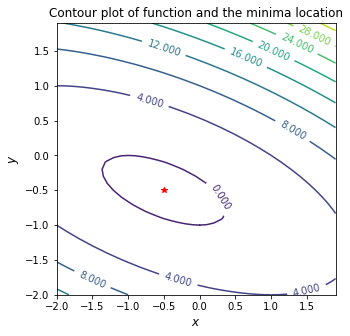

In [2]:
dx = 0.1
x = np.arange(-2.0, 2.0, dx)
y = np.arange(-2.0, 2.0, dx)
X, Y = np.meshgrid(x, y)
f = 1. + 2.*X + 4.*Y + X**2 + 2.*X*Y + 3.*Y**2 

fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111)

cs = ax1.contour(X, Y, f, 10)
ax1.clabel(cs, inline=1, fontsize=10)
ax1.set_title('Contour plot of function and the minima location')
ax1.set_xlabel('$x$', fontsize=12)
ax1.set_ylabel('$y$', fontsize=12)

# solve the linear system for x,y
A = np.array([[2,2],[2,6]])
b = np.array([-2,-4])
x = sl.solve(A,b)
ax1.plot(x[0],x[1],'r*')
#plt.savefig('simple_optimisation.png')

## Homework - 2D linear systems

Recall from the lecture the system

\begin{eqnarray*}
  2x + 3y &=& 7 \\[5pt]
   x - 4y &=& 3,
\end{eqnarray*} 

and the following plot which demonstrated a unique solution.

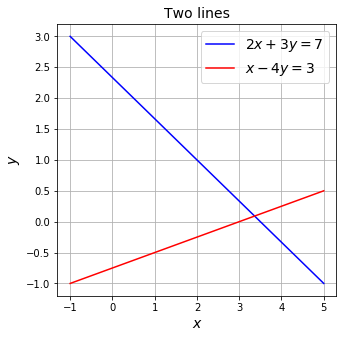

In [3]:
# unique solution
x = np.linspace(-1,5,100)
y1 = -(2./3.)*x + (7./3.)
y2 = (1./4.)*x - (3./4.)

fig = plt.figure(figsize=(5, 5))

ax1 = fig.add_subplot(111)

ax1.set_xlabel("$x$", fontsize=14)
ax1.set_ylabel("$y$", fontsize=14)
ax1.set_title('Two lines', fontsize=14)
ax1.grid(True)

ax1.plot(x,y1,'b', label='$2x+3y=7$')
ax1.plot(x,y2,'r', label='$x-4y=3$')

ax1.legend(loc='best', fontsize=14);

You were asked in class what other situations are possible and to construct examples and the corresponding plots - try to come up with and plot these situations.

Hint: I used the following example as a starting point which was also discussed in the lecture

$$
\left(
  \begin{array}{rr}
    2 & 3 \\
    4 & 6 
  \end{array}
\right)\left(
  \begin{array}{c}
    x \\
    y
  \end{array}
\right) = \left(
  \begin{array}{c}
    4 \\
    8
  \end{array}
\right),
$$

with a second RHS vector of 

$$
\left(
  \begin{array}{c}
    4 \\
    7
  \end{array}
\right)
$$

### Solution 

Consider the problem

$$
\left(
  \begin{array}{rr}
    2 & 3 \\
    4 & 6 
  \end{array}
\right)\left(
  \begin{array}{c}
    x \\
    y
  \end{array}
\right) = \left(
  \begin{array}{c}
    4 \\
    8
  \end{array}
\right),
$$

where the matrix on the LHS clearly has a zero determinant.

Considering now the values in the RHS vector as well, the second equation is simply twice the first, and hence a solution to the first equation is also automatically a solution to the second equation. 

If we think geometrically, and interpret the two equations as constraints, they are **both** constraining our $x,y$ values to the same 1D subspace - any solution along this line in 2D satisfies **both** equations, and hence any of them is a solution to our linear system.

We hence only have one *linearly-independent* equation here, and our problem is under-constrained: we effectively only have one equation for two unknowns and this problem has *infinitely many* possibly solutions (or said another way, we have *existence*, but *non-uniqueness*): e.g. $\boldsymbol{x}=(2,0)^T$ is a solution, so is $\boldsymbol{x}=(-1,2)^T$, etc.


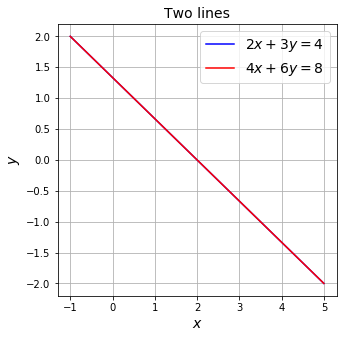

In [4]:
# consider the following situation
x = np.linspace(-1,5,100)
y1 = -(2./3.)*x + (4./3.)
y2 = -(4./6.)*x + (8./6.)

fig = plt.figure(figsize=(5, 5))

ax1 = fig.add_subplot(111)

ax1.set_xlabel("$x$", fontsize=14)
ax1.set_ylabel("$y$", fontsize=14)
ax1.set_title('Two lines', fontsize=14)
ax1.grid(True)

ax1.plot(x,y1,'b', label='$2x+3y=4$')
ax1.plot(x,y2,'r', label='$4x+6y=8$')

ax1.legend(loc='best', fontsize=14);

The following are all true, but not all equivalent statements:

1. The lines now intersect at infinitely many points - not at all points in 2D, but along a 1D subspace embedded within 2D.

2. We therefore have a continuous family of $(x,y)$ pairs of values that satisfy both equations simultaneously.

3. The linear/matrix system has infinitely many solutions (our previous *no solution existence* situation has become a *non-uniqueness* situation).

4. The corresponding matrix has zero determinant.

5. The matrix has no inverse.

Let's check point 4:


In [5]:
A = np.array([[2,3],[4,6]])
print('The determinant is: ',sl.det(A))
print('This is effectively zero:',np.allclose(0,sl.det(A)))

The determinant is:  -6.661338147750939e-16
This is effectively zero: True


Any pair of values that satisfies 

$$x = (4-3y)/2$$

is an exact solution.  Typically we will write solutions of this type in the form  

\begin{align*}
x &= (4-3\alpha)/2\\
y &= \alpha
\end{align*}

where $\alpha$ is an arbitrary constant.

If we instead replaced the RHS vector with $(4,7)^T$, then the two equations would now be contradictory: in this case we have *no solutions* (or *non-existence*).

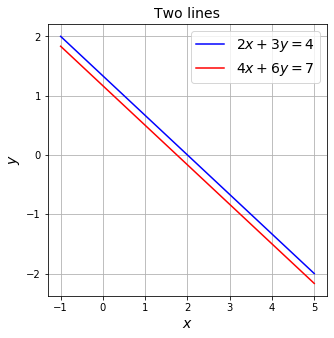

In [6]:
# consider the following situation
x = np.linspace(-1,5,100)
y1 = -(2./3.)*x + (4./3.)
y2 = -(4./6.)*x + (7./6.)

fig = plt.figure(figsize=(5, 5))

ax1 = fig.add_subplot(111)

ax1.set_xlabel("$x$", fontsize=14)
ax1.set_ylabel("$y$", fontsize=14)
ax1.set_title('Two lines', fontsize=14)
ax1.grid(True)

ax1.plot(x,y1,'b', label='$2x+3y=4$')
ax1.plot(x,y2,'r', label='$4x+6y=7$')

ax1.legend(loc='best', fontsize=14);

For this case some of our previous statements will still hold (as the LHS matrix is unchanged), but some will change (as the RHS vector is different):


1. The lines do not intersect at any point.

2. No single $(x,y)$ pair of values can satisfy both equations simultaneously.

3. The linear/matrix system has no solution (we are in a *no solution existence* situation).

4. The corresponding matrix has zero determinant.

5. The matrix has no inverse.


So 4 and 5 haven't changed, but the change in RHS vector has changed 1,2,3 dramatically.


To summarise, other than cases with a unique solution, 2D linear systems can also have no solutions or infinitely many solutions. If we want existence **AND** uniqueness of solution of course both scenarios aren't good!

## Homework - Using row operations to solve the linear system and find the inverse matrix

Consider the linear system

$$
  \begin{pmatrix}
    2 & 3 \\
    1 & -4  
  \end{pmatrix}
  \begin{pmatrix}
    x \\
    y 
  \end{pmatrix}=
  \begin{pmatrix}
    7 \\
    3 
  \end{pmatrix}   
$$

  
form the augmented matrix  $[A|\boldsymbol{b}|I]$ and perform row operations to obtain $[I|\boldsymbol{x}|A^{-1}]$.

### Solution

We can perform these operations in a way that is easy to keep track of by forming the augmented matrix (we add the RHS vector as an additional column). 

In this demonstration where we also want to form the inverse matrix let's additionally add columns corresponding to the inverse matrix. 

The notation above the arrows should hopefully be clear, it's encoding the operations we are performing on the rows, with '(1)' and '(2)' identifying the first and second row, respectively. '$(1)\leftarrow (1)-2(2)$' means replace the first row with the first row minus twice the second row - the operation we performed above.

When we perform these operations on the rows of the matrix $A$, we also apply them to the additional columns in our augmented matrix:

\begin{align*}
[A \, | \, \boldsymbol{b} \, | \, I] = 
&\left[
  \begin{array}{cc|c|cc}
    2 & 3 & 7 & 1 & 0 \\
    1 & -4 & 3 & 0 & 1  
  \end{array}
\right]
\xrightarrow{(1)\leftarrow (1)-2(2)}
\left[
  \begin{array}{cc|c|cc}
    0 & 11 & 1 & 1 & -2 \\
    1 & -4 & 3 & 0 & 1  
  \end{array}
\right]
\xrightarrow{(1)\leftarrow (1)/11}
\left[
  \begin{array}{cc|c|cc}
    0 & 1 & 1/11 & 1/11 & -2/11 \\
    1 & -4 & 3 & 0 & 1  
  \end{array}
\right]\\
&\xrightarrow{(2)\leftarrow (2)+4(1)}
\left[
  \begin{array}{cc|c|cc}
    0 & 1 & 1/11 & 1/11 & -2/11 \\
    1 & 0 & 3+4/11 & 4/11 & 1-8/11  
  \end{array}
\right]
\xrightarrow{(1)\leftrightarrow (2)}
\left[
  \begin{array}{cc|c|cc}
    1 & 0 & 3+4/11 & 4/11 & 1-8/11  \\
    0 & 1 & 1/11 & 1/11 & -2/11 
  \end{array}
\right]
\end{align*}

Now the fact that we have transformed $A$ into $I$ via these so-called *row operations* means that what was originally in the $\boldsymbol{b}$ position is now the solution $\boldsymbol{x}$, and what was originally $I$ is now $A^{-1}$:

$$\boldsymbol{x} =
\begin{pmatrix}
3+4/11\\
1/11
\end{pmatrix}=
\begin{pmatrix}
37/11\\
1/11
\end{pmatrix},\qquad
A^{-1} = 
\begin{pmatrix}
    4/11 & 1-8/11  \\
    1/11 & -2/11 
\end{pmatrix}= 
\begin{pmatrix}
    4/11 & 3/11  \\
    1/11 & -2/11 
\end{pmatrix}= \frac{-1}{11}
\begin{pmatrix}
    -4 & -3  \\
    -1 & 2 
\end{pmatrix}
$$


We can check this answer against our expression for the inverse of a $2\times 2$ linear system.


## Homework - An over-determined system with (by construction) an exact solution

Recall the simple over-determined problem at the end of the lecture where

`A = np.array([[2, 3], [1, -4], [1, 10]])`

You were asked to think about how you could change the RHS vector only in order to come up with a version of the over-determined problem that has an exact solution. You were given the hint to think about the range of the LHS matrix $A$

### Solution

All we need to do is ensure that the RHS vector is in the range of $A$. If it is then we can take an appropriate weighted sum of the columns in order to reach that point, these weights in turn are the solution to the problem $\boldsymbol{x}$.

As an example let's just take $\boldsymbol{b}$ to be the sum of the columns.

If our argument is right the three lines visualising the three equations/constriants should all coincide at a single location, e.g here that should be at the location $\boldsymbol{x} = (1,1)^T$.

Let's plot this situation to check

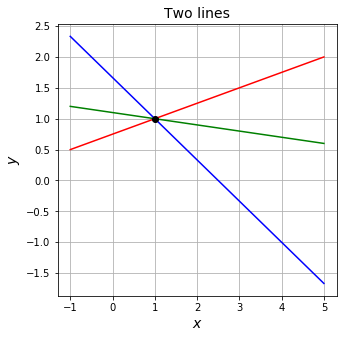

In [7]:
A = np.array([[2, 3], [1, -4], [1, 10]])


# take b to be the sum of the two columns of A
b = A[:,0] + A[:,1]

# Form the matrix A.T @ A
ATA = A.T @ A  

# Form the RHS vector:
rhs = A.T @ b

# plot the three lines
x = np.linspace(-1,5,100)

y1 = -(2./3.)*x + (b[0]/3.)
y2 = (1./4.)*x - (b[1]/4.)
y3 = -(1./10.)*x + (b[2]/10.)

fig = plt.figure(figsize=(5, 5))

ax1 = fig.add_subplot(111)

ax1.set_xlabel("$x$", fontsize=14)
ax1.set_ylabel("$y$", fontsize=14)
ax1.set_title('Two lines', fontsize=14)
ax1.grid(True)

ax1.plot(x,y1,'b')
ax1.plot(x,y2,'r')
ax1.plot(x,y3,'g')

# plot what we hope should be the solution
ax1.plot(1, 1, 'ko')


## Homework - Least squares solution as a compromise between all constraints

At the end of the lecture we showed an example and noted that the least squares solution was attempting to satisfy all three constraint equations, and that the specific value found was the one which minimised $\| A\boldsymbol{x} - \boldsymbol{b}\|_2$.

By perturbing the values of the obtained least squares solution, show that it is indeed the case that these lead to $\| A\boldsymbol{x} - \boldsymbol{b}\|_2$ growing.

### Solution

[[ 2  1  1]
 [ 3 -4 10]] [ 7  3 -1]
array([16, -1])
[[ 2  1]
 [ 3 -4]] [7 3]
array([17,  9])
[[ 2  1]
 [ 3 10]] [ 7 -1]
array([13, 11])
[[ 1  1]
 [-4 10]] [ 3 -1]
array([  2, -22])


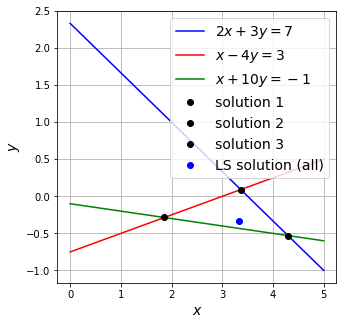

In [8]:
A = np.array([[2, 3], [1, -4], [1, 10]])
b = np.array([7,3,-1])

def ls_solution(A,b):
    ATA = A.T @ A  
    # Form the RHS vector:
    print(A.T,b)
    rhs = A.T @ b.T
    pprint(rhs)
    # solve the system
    return sl.solve(ATA, rhs)

# solve our 3x2 problem using LS
ls_sol = ls_solution(A, b)
# solve the three individual 2x2 problems - can still use the LS code
ls_sol1 = ls_solution(A[ [0,1] ,: ], b[ [0,1] ])
ls_sol2 = ls_solution(A[ [0,2] ,: ], b[ [0,2] ])
ls_sol3 = ls_solution(A[ [1,2] ,: ], b[ [1,2] ])

# plot this solution to see where it lies
x = np.linspace(0,5,100)

y1 = -(2./3.)*x + (7./3.)
y2 = (1./4.)*x - (3./4.)
y3 = -(1./10.)*x - (1./10.)


fig = plt.figure(figsize=(5, 5))

ax1 = fig.add_subplot(111)

ax1.set_xlabel("$x$", fontsize=14)
ax1.set_ylabel("$y$", fontsize=14)
ax1.grid(True)

ax1.plot(x,y1,'b', label='$2x+3y=7$')
ax1.plot(x,y2,'r', label='$x-4y=3$')
ax1.plot(x,y3,'g', label='$x+10y=-1$')
ax1.plot(ls_sol1[0], ls_sol1[1], 'ko', label='solution 1')
ax1.plot(ls_sol2[0], ls_sol2[1], 'ko', label='solution 2')
ax1.plot(ls_sol3[0], ls_sol3[1], 'ko', label='solution 3')
ax1.plot(ls_sol[0], ls_sol[1], 'bo', label='LS solution (all)')

ax1.legend(loc='best', fontsize=14)

[[ 2  1  1]
 [ 3 -4 10]] [ 7  3 -1]
array([16, -1])
[[ 2  1  1]
 [ 3 -4 10]] [ 7  3 -1]
array([16, -1])


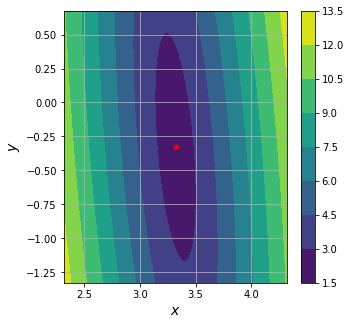

In [9]:
A = np.array([[2, 3], [1, -4], [1, 10]])
b = np.array([7,3,-1])

# solve our 3x2 problem using LS
ls_sol = ls_solution(A, b)

# construct a grid of points in (x,y) around this solution location 
pert = 1.
# construct a mesh
# 100 points spread either side of ls_sol, of extent pert
x = np.linspace(ls_sol[0] - pert, ls_sol[0] + pert, 100)
y = np.linspace(ls_sol[1] - pert, ls_sol[1] + pert, 100)
errors = np.zeros([len(x), len(y)])
for i, xi in enumerate(x):
    for j, yj in enumerate(y):
        errors[i,j] = np.linalg.norm( A@np.array([xi, yj]) - b)

fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111)

ax1.set_xlabel("$x$", fontsize=14)
ax1.set_ylabel("$y$", fontsize=14)
ax1.grid(True)

cs = ax1.contourf(x,y,errors)
fig.colorbar(cs, ax=ax1)
# add our LS solution
ls_sol = ls_solution(A, b)

ax1.plot(ls_sol[0], ls_sol[1], 'r*')


## Homework - An even simpler over-determined case

In the lecture, and above, we considered the simple case of three equations, two unknowns.

Of course there is an even simpler case - two-equations, one unknown.

An example might be

$$
\begin{align*}
  2x &= 8 \\[5pt]
   3x &= 9
\end{align*}
   \quad \iff \quad
  \begin{pmatrix}
    2 \\[5pt]
    3
  \end{pmatrix}
  \begin{pmatrix}
    x 
  \end{pmatrix}=
  \begin{pmatrix}
    8 \\
    9 
  \end{pmatrix}   
$$

Does this have a solution?

No clearly not. What solution does the least square approach return?

### Solution

Let's do it by hand and then with code.

The least squares solution will minimise the quantity $\| A\boldsymbol{x} - \boldsymbol{b}\|_2$, 

i.e. here (squaring for simplicity), that minimises

$$
\left\| 
\begin{align*}
  2x - 8 \\[5pt]
   3x - 9
\end{align*}
\right\|_2^2
 = { (2x - 8)^2 + (3x - 9)^2 }
$$

This is equal to 

$$ (4 x^2  -32 x + 64) + (9 x^2  -54 x + 81) = 13 x^2  -86 x +  145 $$

to find the $x$ that minimises this let's differentiate and set to zero:

$$26 x - 86 = 0 \Rightarrow x = 86/26 = 43/13$$

<br>

Now let's compute by hand what the least squares implementation from the lecture does, i.e. solve 

$$A^TA\boldsymbol{x} = A^T\boldsymbol{b}$$

Here 

$$ A^TA = (2, 3) 
  \begin{pmatrix}
  2 \\[5pt]
   3
  \end{pmatrix}
 = 13
 $$
 
 and
 
$$A^T\boldsymbol{b} = (2,3)
  \begin{pmatrix}
  8 \\[5pt]
   9
  \end{pmatrix}
= 43$$

and so this also produces $ x = 43/13$.

Let's implement in code and check we get the same answer.

In [10]:
A = np.array([ [2], [3] ])
b = np.array([ [8], [9] ])
# Form the matrix A.T @ A
ATA = A.T @ A  

# Form the RHS vector:
rhs = A.T @ b

# solve the system
ls_sol = sl.solve(ATA, rhs)

print(ls_sol, 43/13)

[[3.30769231]] 3.3076923076923075


##  Homework - Curve-fitting - response to outliers

Recall that in the case of interpolation or curve fitting by evaluating our candidate polynomial at all the data points we arrived at a linear system, which in the curve-fitting case was over-determined, i.e. in general did not have a solution - we couldn't find coefficients of the polynomial such that it went through all data points, but did come up with a method that found the coefficients such that the polynomial minimised the 2 norm of the errors to the data.

This was what the approach that the `numpy.polyfit` function used.

But why the 2-norm, i.e. why seek the least squares solution.

What about trying to minimse a different norm of the errors to the data?

And what happens if we have outliers in our data, i.e. what if one (or a small number) of our data points is spurious.

Here we are going to fit a *linear* line to some invented data, and see what happens if we create an outlier - how much is the slope of the best-fit line impacted?

The code is a but complicated so I suggest you just read through this, there isn't really a question here for you to answer.

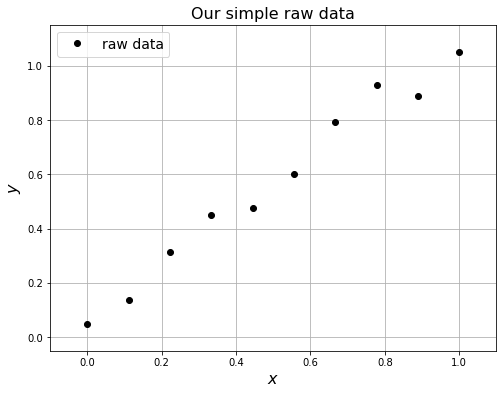

In [11]:
# Invent some raw data - we will use the notation (xi,yi) for the
# given data, where xi and yi are of length N+1 (N=len(xi)-1)
xi = np.linspace(0,1,10)
yi = xi +  0.2 * np.random.random((10,))

# We will want to overlay a plot of the raw data a few times below so 
# let's do this via a function that we can call repeatedly
# [Note that I've been a bit lazy in later lectures and really should
# do this sort of thing more often to make code easier to read - apologies]
def plot_raw_data(xi, yi, ax):
    """plot x vs y on axes ax, 
    add axes labels and turn on grid
    """
    ax.plot(xi, yi, 'ko', label='raw data')
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$y$', fontsize=16)
    ax.grid(True)


# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)

# For clarity we are going to add a small margin to all the plots.
ax1.margins(0.1)

# plot the raw data
plot_raw_data(xi, yi, ax1)

# add a figure title
ax1.set_title('Our simple raw data', fontsize=16)

# Add a legend
ax1.legend(loc='best', fontsize=14);
# loc='best' means we let matplotlib decide the best place for the
# legend to go.  For other options see 
#  https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html

poly_coeffs:  [1.01153478 0.06317285]


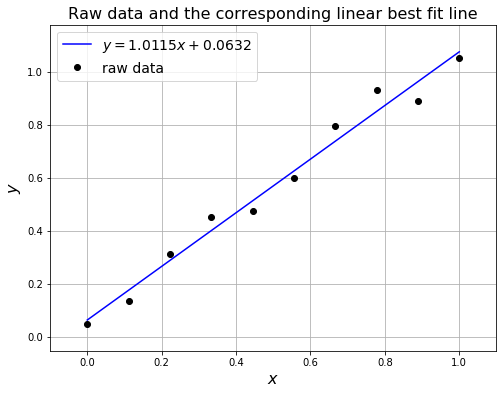

In [12]:
# Fit a polynomial of degree 1, i.e. a straight line, to our (xi, yi) data from above
# we'll explain what's going on here later in this lecture
degree = 1
poly_coeffs = np.polyfit(xi, yi, degree)
print('poly_coeffs: ',poly_coeffs)

# use poly1d to turn the coeffs into a function, p1, we can evaluate
p1 = np.poly1d(poly_coeffs)

# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

# Plot the linear fit - define 100 evenly spaced points (x) covering our
# x extent and plot our linear polynomial evaluated at these points (p1(x))
# of course 100 is overkill for this linear example
x = np.linspace(0., 1, 100)

ax1.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(poly_coeffs[0], poly_coeffs[1]))

# Overlay raw data
plot_raw_data(xi, yi, ax1)

# Add a legend
ax1.legend(loc='best', fontsize=14)

# add a figure title
ax1.set_title('Raw data and the corresponding linear best fit line', fontsize=16);

We have used NumPy's polynomial fitting function which "minimises the squared error" <https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html>

i.e. it seeks the polynomial (here we chose just a straight line) which minimises the two-norm of the errors at the locations where we have data.

We can code this up ourselves using a SciPy `minimise` function, and in doing so check our code recreates above when we choose the two-norm, but also see what happens if we select other norms with which to define the best fitting line.

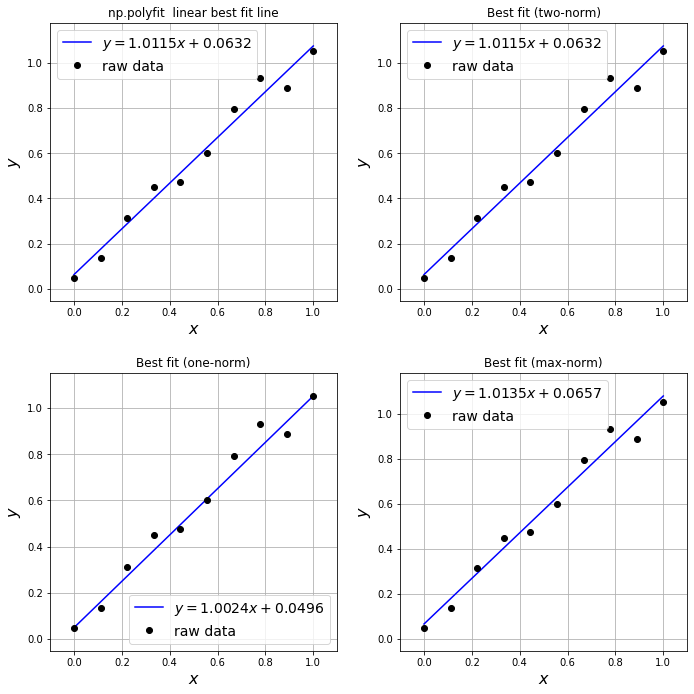

In [13]:
from scipy.optimize import minimize

def line_fit(x, line_coeffs):
    return line_coeffs[0]*x + line_coeffs[1]

def cost_fun(line_coeffs, x, y, norm):
    if norm=='two':
        return sl.norm(y - line_fit(x, line_coeffs), 2)
    elif norm=='one':
        return sl.norm(y - line_fit(x, line_coeffs), 1)
    elif norm=='max':
        return sl.norm(y - line_fit(x, line_coeffs), np.inf)
    else:
        raise ValueError('check your norm string')

degree = 1
poly_coeffs = np.polyfit(xi, yi, degree)
p1 = np.poly1d(poly_coeffs)

# set up figure
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(221)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(poly_coeffs[0], poly_coeffs[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('np.polyfit  linear best fit line', fontsize=12)
        
x0 = poly_coeffs
output = minimize(cost_fun, x0, args=(xi,yi,'two'))
# use poly1d to turn the coeffs into a function, p1, we can evaluate
p1 = np.poly1d(output.x)
ax = fig.add_subplot(222)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(output.x[0], output.x[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('Best fit (two-norm)', fontsize=12)

x0 = poly_coeffs
output = minimize(cost_fun, x0, args=(xi,yi,'one'))
# use poly1d to turn the coeffs into a function, p1, we can evaluate
p1 = np.poly1d(output.x)
ax = fig.add_subplot(223)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(output.x[0], output.x[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('Best fit (one-norm)', fontsize=12)

x0 = poly_coeffs
output = minimize(cost_fun, x0, args=(xi,yi,'max'))
# use poly1d to turn the coeffs into a function, p1, we can evaluate
p1 = np.poly1d(output.x)
ax = fig.add_subplot(224)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(output.x[0], output.x[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('Best fit (max-norm)', fontsize=12)


plt.tight_layout(pad = 2.0)

Note that our code recreates the `numpy.polyfit` result when we choose the two-norm. Note also that we get slightly different results when we use the one-norm or the max-norm.

These results are all equally valid. The fact that `numpy.polyfit` implements the two-norm without giving us the ability to change the norm highlights that so-called "least squares" fitting is by far the most common approach, but there may be situations where the other norms are beneficial.

Let's see what happens when we perturb a single entry - this is motivated by a situation where maybe one of our sensors failed and gave a spurious result.

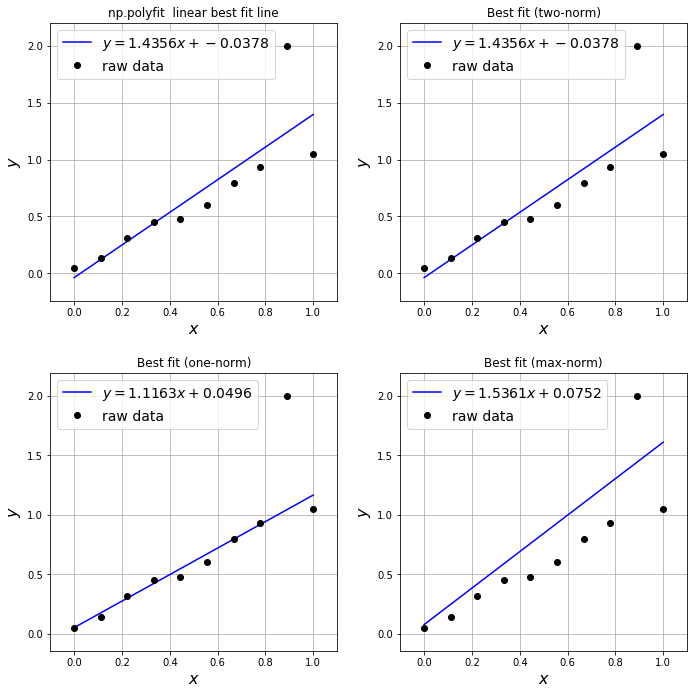

In [14]:
#perturb one of the entries

yi[8] = 2.

degree = 1
poly_coeffs = np.polyfit(xi, yi, degree)
p1 = np.poly1d(poly_coeffs)

# set up figure
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(221)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(poly_coeffs[0], poly_coeffs[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('np.polyfit  linear best fit line', fontsize=12)
        
x0 = poly_coeffs
output = minimize(cost_fun, x0, args=(xi,yi,'two'))
# use poly1d to turn the coeffs into a function, p1, we can evaluate
p1 = np.poly1d(output.x)
ax = fig.add_subplot(222)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(output.x[0], output.x[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('Best fit (two-norm)', fontsize=12)

x0 = poly_coeffs
output = minimize(cost_fun, x0, args=(xi,yi,'one'))
# use poly1d to turn the coeffs into a function, p1, we can evaluate
p1 = np.poly1d(output.x)
ax = fig.add_subplot(223)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(output.x[0], output.x[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('Best fit (one-norm)', fontsize=12)

x0 = poly_coeffs
output = minimize(cost_fun, x0, args=(xi,yi,'max'))
# use poly1d to turn the coeffs into a function, p1, we can evaluate
p1 = np.poly1d(output.x)
ax = fig.add_subplot(224)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(output.x[0], output.x[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('Best fit (max-norm)', fontsize=12)


plt.tight_layout(pad = 2.0)

If you compare the resulting slopes of the best fit lines, between this case with the outlier with the previous slopes without the outlier, you should see that the one-norm is by far the least impacted while the max-norm is the most impacted.